<a href="https://colab.research.google.com/github/brunobro/ClassificationOfSoybeanGenotypes/blob/main/ClassificationOfSoybeanGenotypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Classification of soybean genotypes in drought and saline stress environment using Decision Tree algorithm

Classify the samples as belonging to the control or stress group (Drought, Saline). Such a model will make it possible to identify whether the plant has suffered any type of stress such as drought or excess salt.


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, SVG
from graphviz import Source
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
'''
Read data and Create dataset
'''
df = pd.read_csv('data_classification.csv')

y = np.array(df['CLASS'])
Cultivar = np.array(df['CULTIVAR'])
del df['CLASS']
del df['CULTIVAR']
X = np.array(df, dtype=np.float32)

In [3]:
'''
Check the best parameters
Extracted cross-validation was used to prevent a sample of the same genotype from being in both the training set and the test set.
'''
param_grid = {"max_depth": [1, 2, 5, 10, None],
              "max_features": [1, 3, 5, 7],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [20, 40, 80, 120, 200, 500]}

group_kfold = GroupKFold(n_splits=10)

K = 1
for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 10, scoring='accuracy')
  clf.fit(X_train, y_train)

  print(clf.best_params_)
  print(clf.best_score_)

  K = K + 1

Fold 1
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 7, 'n_estimators': 40}
0.9675510204081632
Fold 2
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'n_estimators': 500}
0.9674285714285713
Fold 3
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 7, 'n_estimators': 500}
0.953265306122449
Fold 4
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 1, 'n_estimators': 80}
0.9613877551020409
Fold 5
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'n_estimators': 80}
0.9634285714285715
Fold 6
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'n_estimators': 200}
0.9533061224489796
Fold 7
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'n_estimators': 120}
0.9581960784313726
Fold 8
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'n_estimators': 120}
0.9602

In [4]:
'''
Random Forest with fixed parameter, over 10-fold, using the measures of accuracy, precision and recall and confusion matrix
'''
K = 1

acc_train = []
acc_test  = []

pr_train = []
pr_test  = []

re_train = []
re_test  = []

mc_train = []
mc_test  = []

train_indices = []
test_indices  = []

group_kfold = GroupKFold(n_splits=10)

for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=5, n_estimators=80, max_features=1, random_state=0)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test  = clf.predict(X_test)

  r_acc_train = accuracy_score(y_train, y_pred_train)
  r_acc_test  = accuracy_score(y_test, y_pred_test)
  acc_train.append(r_acc_train)
  acc_test.append(r_acc_test )

  r_pr_train = precision_score(y_train, y_pred_train, average='weighted')
  r_pr_test  = precision_score(y_test, y_pred_test, average='weighted')
  pr_train.append(r_pr_train)
  pr_test.append(r_pr_test)

  r_re_train = recall_score(y_train, y_pred_train, average='weighted')
  r_re_test  = recall_score(y_test, y_pred_test, average='weighted')
  re_train.append(r_re_train)
  re_test.append(r_re_test)

  r_mc_train = confusion_matrix(y_train, y_pred_train)
  r_mc_test  = confusion_matrix(y_test, y_pred_test)
  mc_train.append(r_mc_train)
  mc_test.append(r_mc_test)

  print('\t Training: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_train, r_pr_train, r_re_train))
  print('\t Test: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_test, r_pr_test, r_re_test))

  K = K + 1

acc_train = np.array(acc_train)
acc_test  = np.array(acc_test)

pr_train = np.array(pr_train)
pr_test  = np.array(pr_test)

re_train = np.array(re_train)
re_test  = np.array(re_test)

mc_train = np.array(mc_train)
mc_test  = np.array(mc_test )

print('\n')
print('Average - Training')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_train.mean(), pr_train.mean(), re_train.mean()))
print('Average - Test')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_test.mean(), pr_test.mean(), re_test.mean()))

Fold 1
	 Training: 
	 Acc: 0.9878 - Pr: 0.9878 - Re: 0.9878
	 Test: 
	 Acc: 0.9000 - Pr: 0.9039 - Re: 0.9000
Fold 2
	 Training: 
	 Acc: 0.9878 - Pr: 0.9878 - Re: 0.9878
	 Test: 
	 Acc: 0.9333 - Pr: 0.9444 - Re: 0.9333
Fold 3
	 Training: 
	 Acc: 0.9797 - Pr: 0.9797 - Re: 0.9797
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 4
	 Training: 
	 Acc: 0.9858 - Pr: 0.9858 - Re: 0.9858
	 Test: 
	 Acc: 0.9333 - Pr: 0.9360 - Re: 0.9333
Fold 5
	 Training: 
	 Acc: 0.9817 - Pr: 0.9818 - Re: 0.9817
	 Test: 
	 Acc: 0.9500 - Pr: 0.9565 - Re: 0.9500
Fold 6
	 Training: 
	 Acc: 0.9878 - Pr: 0.9878 - Re: 0.9878
	 Test: 
	 Acc: 0.9500 - Pr: 0.9507 - Re: 0.9500
Fold 7
	 Training: 
	 Acc: 0.9821 - Pr: 0.9823 - Re: 0.9821
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 8
	 Training: 
	 Acc: 0.9821 - Pr: 0.9823 - Re: 0.9821
	 Test: 
	 Acc: 0.9375 - Pr: 0.9434 - Re: 0.9375
Fold 9
	 Training: 
	 Acc: 0.9921 - Pr: 0.9921 - Re: 0.9921
	 Test: 
	 Acc: 0.9792 - Pr: 0.9804 - Re: 0.9792
Fold 10
	 Training:

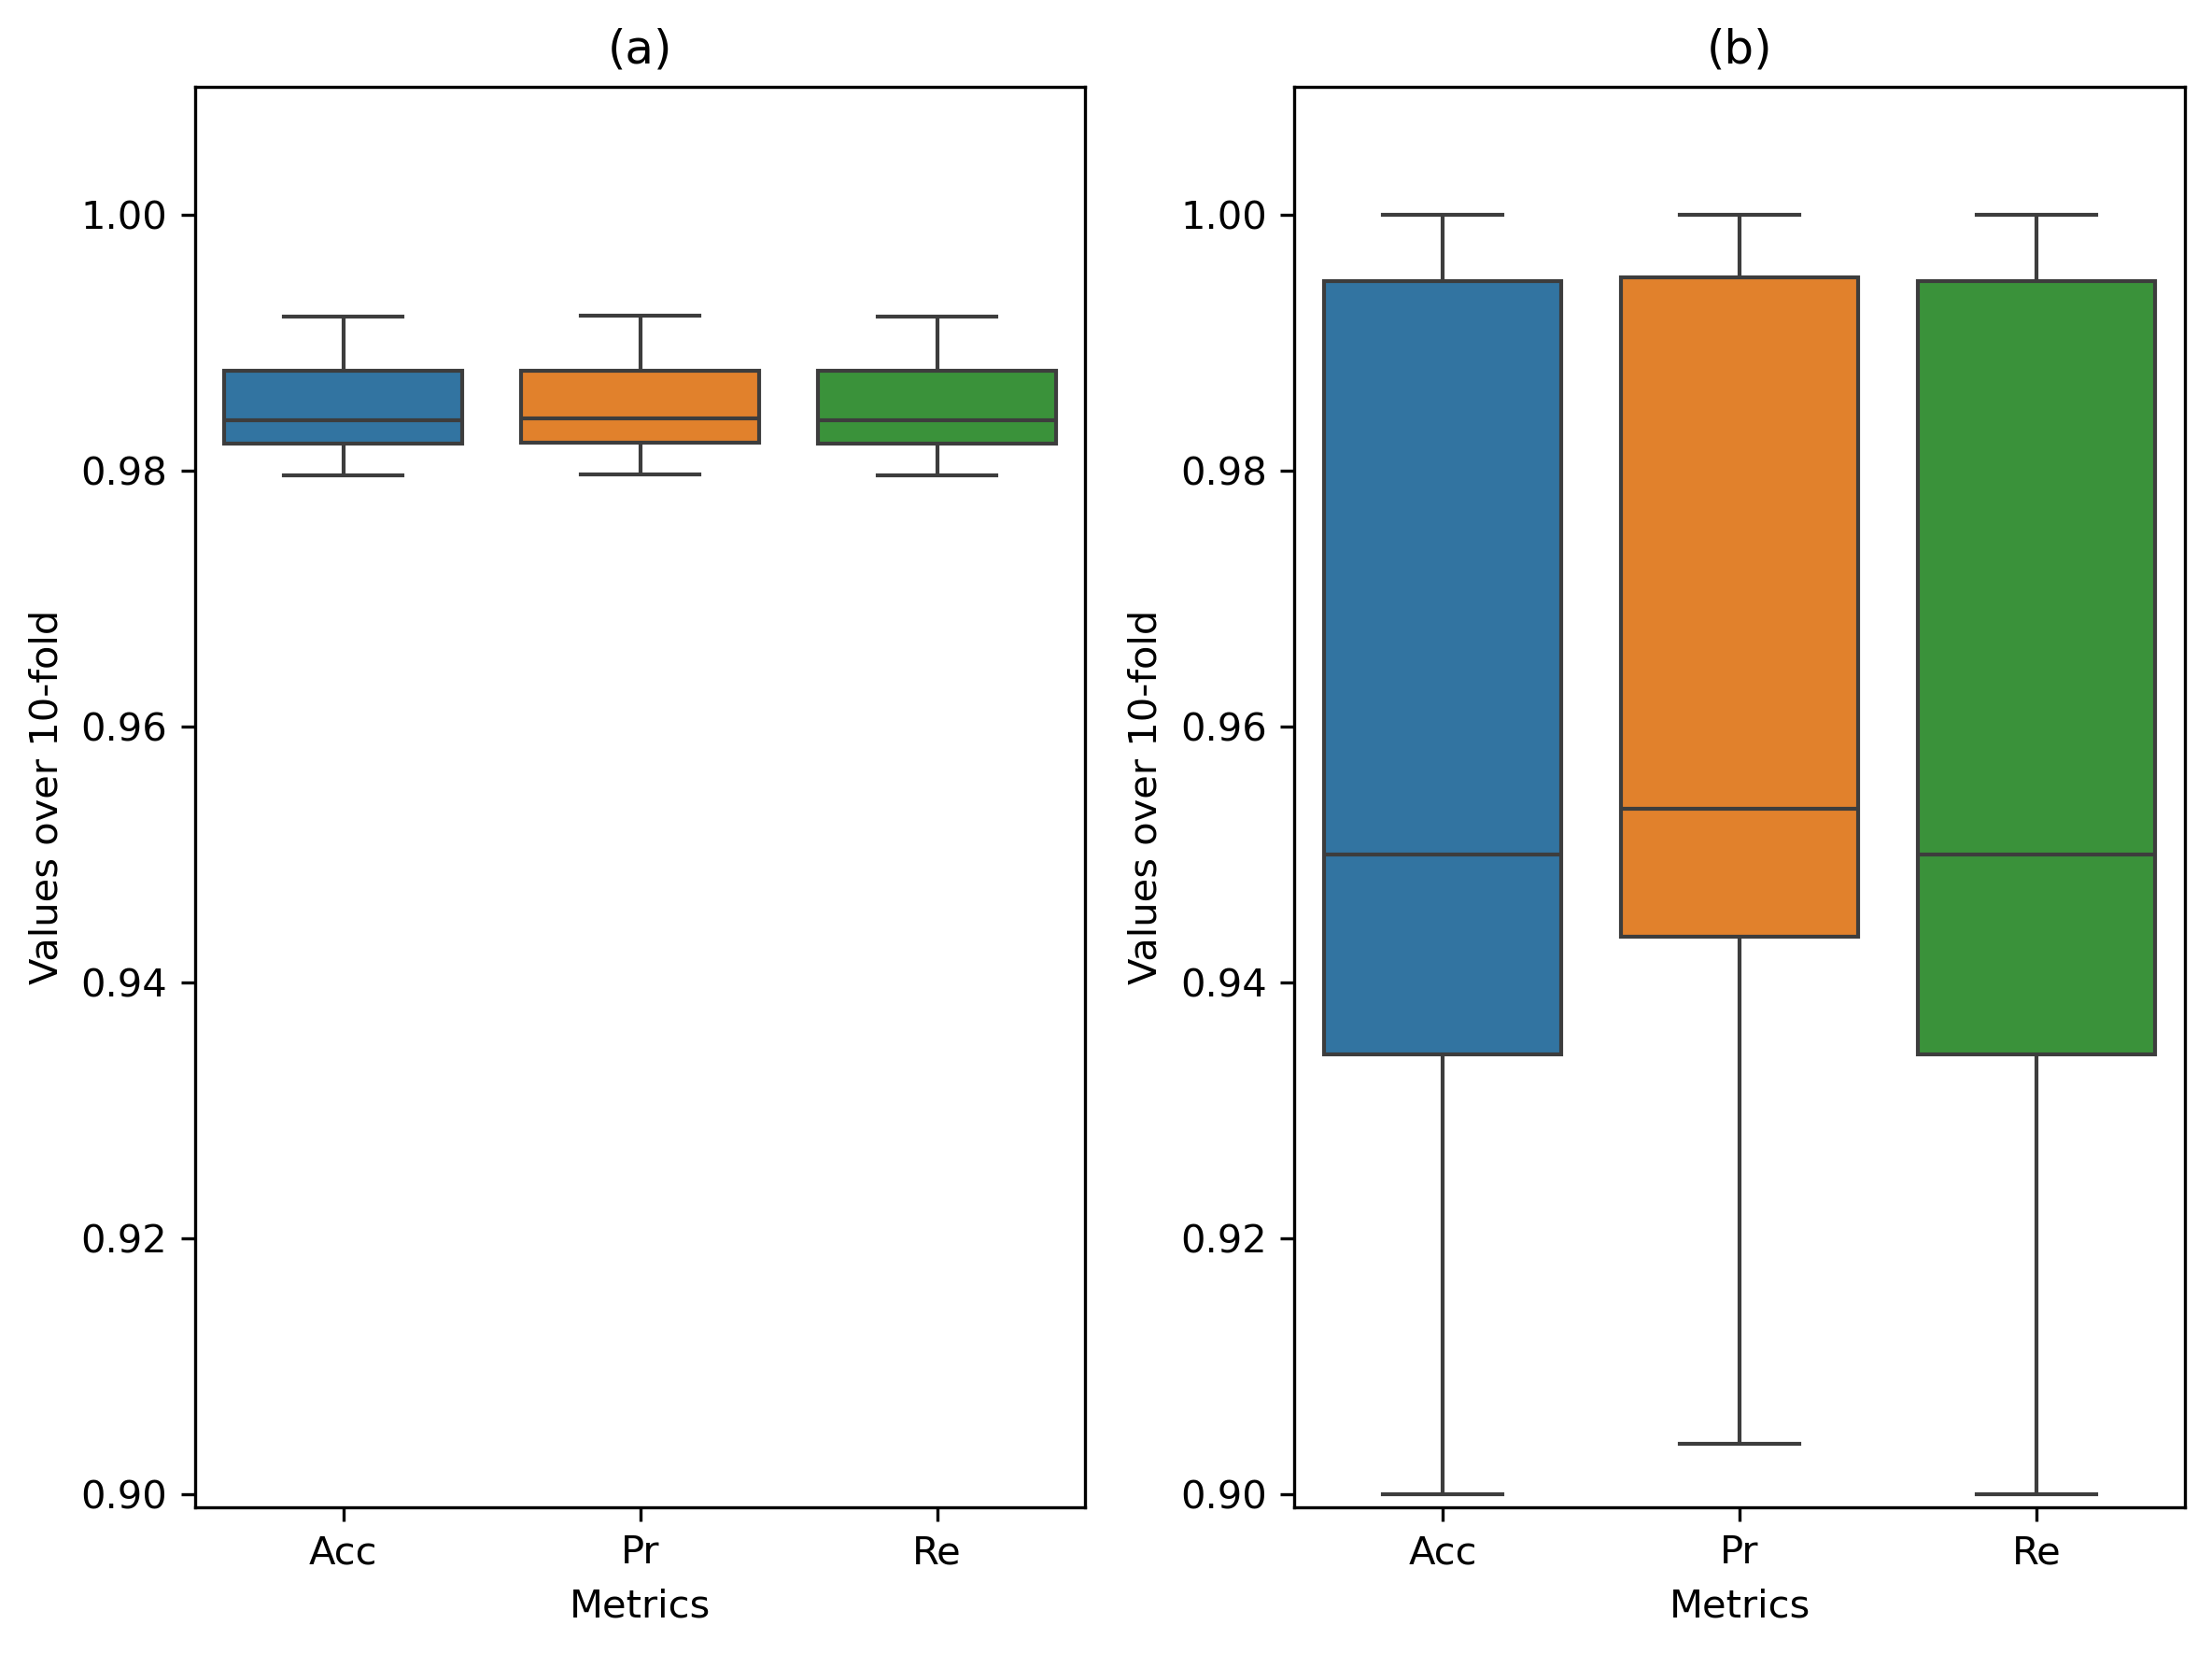

In [5]:
df_train = pd.DataFrame()
df_train['Acc'] = acc_train
df_train['Pr']  = pr_train
df_train['Re']  = re_train

df_test = pd.DataFrame()
df_test['Acc'] = acc_test
df_test['Pr']  = pr_test
df_test['Re']  = re_test

plt.figure(dpi=300, figsize=(8,6))
plt.subplot(121)
plt.title('(a)')
sns.boxplot(data=df_train)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.subplot(122)
plt.title('(b)')
sns.boxplot(data=df_test)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.tight_layout()
plt.show()

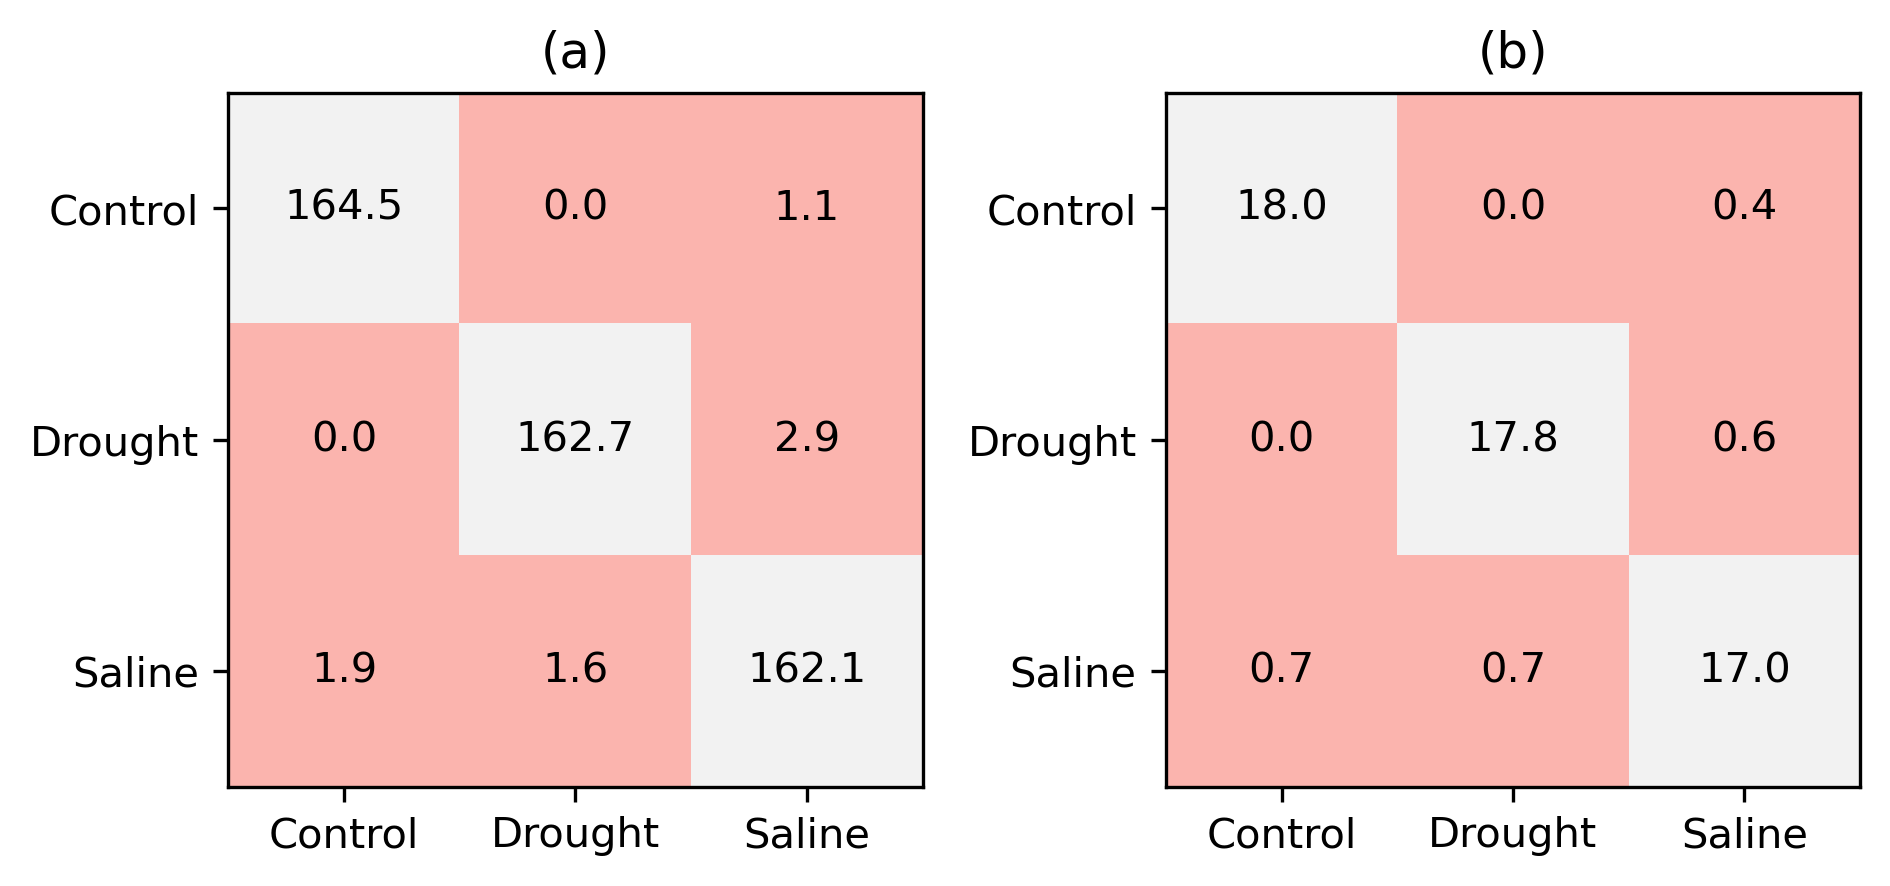

In [6]:
'''
Plot the average confusion matrix
'''
classes = ["Control", "Drought", "Saline"]

MC_train = np.mean(mc_train, axis=0)
MC_test  = np.mean(mc_test, axis=0)

fig = plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(MC_train, cmap='Pastel1')
plt.title('(a)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_train[k, j], ha="center", va="center", color="k")

plt.subplot(122)
plt.imshow(MC_test, cmap='Pastel1')
plt.title('(b)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_test[k, j], ha="center", va="center", color="k")

fig.tight_layout()
plt.show()

In [7]:
'''
Checks which cultivars generate the most prediction errors
'''

Cultivars_errs_train = []
Cultivars_errs_test = []

group_kfold = GroupKFold(n_splits=10)

for train_index, test_index in group_kfold.split(X, y, Cultivar):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=5, n_estimators=80, max_features=1, random_state=0)
  clf.fit(X_train, y_train)

  for i, x_train in enumerate(X_train):
    y_pred_train = clf.predict(x_train.reshape(1, -1))[0]
    if y_pred_train != y_train[i]:
      Cultivars_errs_train.append([Cultivar[train_index[i]], y_train[i], y_pred_train])

  for i, x_test in enumerate(X_test):
    y_pred_test = clf.predict(x_test.reshape(1, -1))[0]
    if y_pred_test != y_test[i]:
      Cultivars_errs_test.append([Cultivar[test_index[i]], y_test[i], y_pred_test])

In [8]:
Cultivares_errs_train_ = []
last_cultivar = None
for cultivar in Cultivars_errs_train:
  if cultivar != last_cultivar:
    Cultivares_errs_train_.append(cultivar)
    last_cultivar = cultivar

Cultivares_errs_train_ = np.array(Cultivares_errs_train_)
Cultivares_errs_name_train = list(Cultivares_errs_train_[:,0])

Cultivares_errs_test_ = []
last_cultivar = None
for cultivar in Cultivars_errs_test:
  if cultivar != last_cultivar:
    Cultivares_errs_test_.append(cultivar)
    last_cultivar = cultivar

Cultivares_errs_test_ = np.array(Cultivares_errs_test_)
Cultivares_errs_name_test = list(Cultivares_errs_test_[:,0])

In [9]:
print('Cultivars with more prediction errors')

print('> Training')
for cultivar in Cultivares_errs_name_train:
  print(cultivar, ': ', Cultivares_errs_name_train.count(cultivar), ' # ', end='')

print('\n> Test')
for cultivar in Cultivares_errs_name_test:
  print(cultivar, ': ', Cultivares_errs_name_test.count(cultivar), ' # ', end='')

Cultivars with more prediction errors
> Training
5D 615 RR :  7  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # CG 8166 RR :  2  # DESAFIO RR :  8  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # NS 6909 IPRO :  8  # M7110 IPRO  :  9  # DESAFIO RR :  8  # 5D 615 RR :  7  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # NS 6909 IPRO :  8  # M7110 IPRO  :  9  # PONTA IPRO :  5  # DESAFIO RR :  8  # NS 5151 IPRO :  9  # NS 6909 IPRO :  8  # CG 8166 RR :  2  # M7110 IPRO  :  9  # PONTA IPRO :  5  # DESAFIO RR :  8  # 5D 615 RR :  7  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # NS 6909 IPRO :  8  # AS 3575 IPRO :  2  # M7110 IPRO  :  9  # PONTA IPRO :  5  # 5D 615 RR :  7  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # M7110 IPRO  :  9  # DESAFIO RR :  8  # 5D 615 RR :  7  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # NS 6909 IPRO :  8  # NS 7338 IPRO :  3  # M7110 IPRO  :  9  # DESAFIO RR :  8  # 5D 615 RR :  7  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # NS 6909 IPRO :  8  # NS 7338 IP

In [10]:
'''
Features importance
Show boxplot for folds
'''
importances = []

group_kfold = GroupKFold(n_splits=10)

K = 1
for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=5, n_estimators=80, max_features=1, random_state=0)
  clf.fit(X_train, y_train)
  imp = clf.feature_importances_
  print(imp)
  importances.append(clf.feature_importances_)
  K = K + 1


Fold 1
[0.06361904 0.20684187 0.1329444  0.16514362 0.21488607 0.03991441
 0.17665059]
Fold 2
[0.05810792 0.23103753 0.12849301 0.15628324 0.21301788 0.03813854
 0.17492188]
Fold 3
[0.06052834 0.19415111 0.13782729 0.17100878 0.21179552 0.0351909
 0.18949806]
Fold 4
[0.05651819 0.20535449 0.13546557 0.17177822 0.19517616 0.03836198
 0.1973454 ]
Fold 5
[0.05812423 0.19686058 0.14776296 0.16131903 0.21480968 0.03988743
 0.1812361 ]
Fold 6
[0.05791421 0.19592832 0.13628818 0.16748706 0.19594076 0.04006555
 0.20637593]
Fold 7
[0.05473043 0.2036529  0.14079175 0.16016482 0.20736675 0.03901954
 0.19427381]
Fold 8
[0.05631077 0.1989583  0.14379625 0.15693112 0.21206646 0.03847227
 0.19346483]
Fold 9
[0.05859453 0.1925139  0.13543886 0.18576016 0.21283539 0.03669123
 0.17816593]
Fold 10
[0.05933824 0.20314159 0.14339112 0.16481456 0.20706732 0.03820022
 0.18404695]


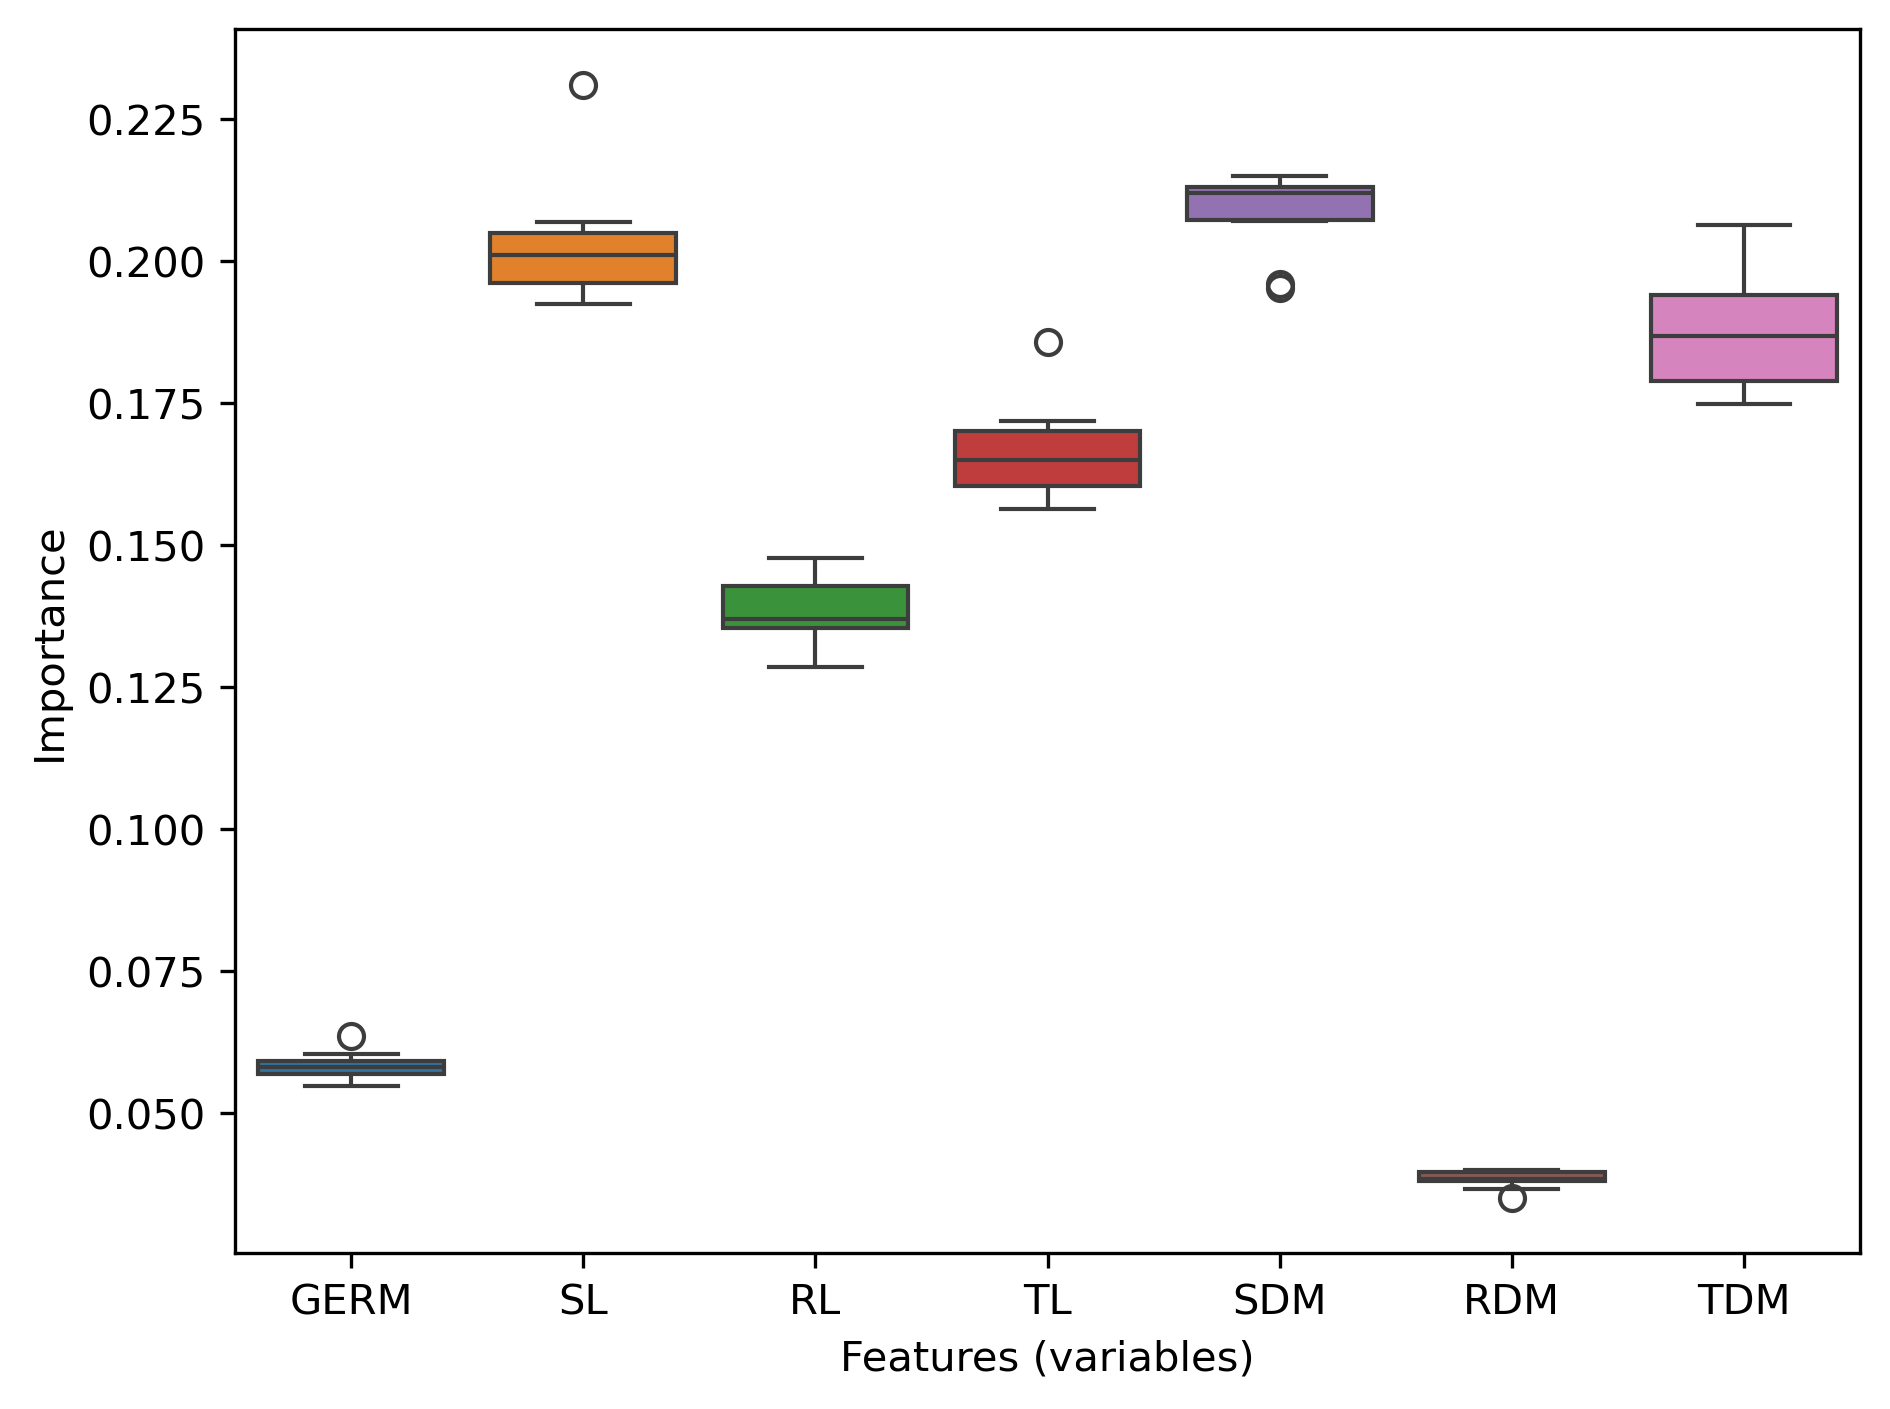

,GERM,SL,RL,TL,SDM,RDM,TDM
0,0.063619,0.206842,0.132944,0.165144,0.214886,0.039914,0.176651
1,0.058108,0.231038,0.128493,0.156283,0.213018,0.038139,0.174922
2,0.060528,0.194151,0.137827,0.171009,0.211796,0.035191,0.189498
3,0.056518,0.205354,0.135466,0.171778,0.195176,0.038362,0.197345
4,0.058124,0.196861,0.147763,0.161319,0.214810,0.039887,0.181236
5,0.057914,0.195928,0.136288,0.167487,0.195941,0.040066,0.206376
6,0.054730,0.203653,0.140792,0.160165,0.207367,0.039020,0.194274
7,0.056311,0.198958,0.143796,0.156931,0.212066,0.038472,0.193465
8,0.058595,0.192514,0.135439,0.185760,0.212835,0.036691,0.178166
9,0.059338,0.203142,0.143391,0.164815,0.207067,0.038200,0.184047


In [11]:
importances = np.array(importances)
df = pd.DataFrame()
df['GERM'] = importances[:,0]
df['SL']   = importances[:,1]
df['RL']   = importances[:,2]
df['TL']   = importances[:,3]
df['SDM']  = importances[:,4]
df['RDM']  = importances[:,5]
df['TDM']  = importances[:,6]

plt.figure(dpi=300)
sns.boxplot(data=df)
plt.xlabel('Features (variables)')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

display(df)

In [12]:
'''
Show a decision tree
'''
clf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=5, n_estimators=80, max_features=1, random_state=0)
clf.fit(X, y)
y_pred = clf.predict(X)
print('Acc: %.4f' %accuracy_score(y, y_pred))

models  = clf.estimators_
classes = clf.classes_

'''
Para codificar os valores a seguir
'''
enc = LabelEncoder().fit(classes)


Acc: 0.9764


In [13]:
'''
Save a decision tree
'''
def saveTree(model, name):
  vars    = ['GERM', 'SL', 'RL', 'TL', 'SDM', 'RDM', 'TDM']
  classes = list(np.unique(y))
  graph_data = export_graphviz(model, feature_names=vars, class_names=classes, filled=True, rounded=True, out_file=None, impurity=False)
  graph = Source(graph_data)
  SVG(graph.pipe(format='svg'))
  graph.format = 'png'
  graph.render(name, view=True)

'''
Get the model with the fewest nodes
'''
max_nodes      = 1E100
model_selected = None

for model in models:
  M = model.tree_.node_count
  if M < max_nodes:
    max_nodes = M
    model_selected = model

saveTree(model_selected, 'fewer_node')

y_pred = model_selected.predict(X)
print('Simplest tree')
print('Acc: %.4f' %accuracy_score(enc.transform(y), y_pred))

'''
Get the model with the best accuracy
To calculate the accuracy it will be necessary to code the classes
Because the models in clf.estimators_ consider them as numbers
'''
higher_acc     = 0
model_selected = None

for model in models:
  y_pred = model.predict(X)
  acc = accuracy_score(enc.transform(y), y_pred)
  if acc > higher_acc:
    model_selected = model
    higher_acc = acc

saveTree(model_selected, 'higher_acc')

y_pred = model_selected.predict(X)
print('\nMost accurate tree')
print('Acc: %.4f' %accuracy_score(enc.transform(y), y_pred))

Simplest tree
Acc: 0.9457

Most accurate tree
Acc: 0.9692
